# Quantum Bit String Comparator

Simple quantum circuit that compares the values of two Quibits, $X$ and $Y$

In [1]:
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, assemble
from math import pi
from Circuits import getMeasure, getBloch, stateGenerator
%matplotlib inline

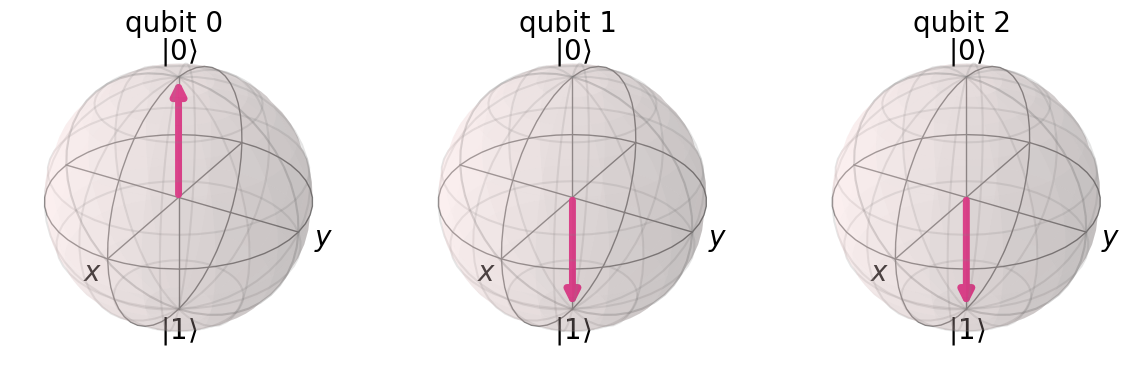

In [2]:
backend = Aer.get_backend('statevector_simulator')
qr = QuantumRegister(3)
qc = ClassicalRegister(3)
circ = QuantumCircuit(qr, qc)
initializedState =stateGenerator('011')
circ.initialize(initializedState, qr)
getBloch(circ, backend)

 - Qubit 1: $Y$
 - Qubit 2: $X$
 - Qubit 3: $Y > X$

In [3]:
circ.csx(1,2)
circ.cx(0,1)
circ.crx(-pi/2, 0, 2) #qiskit does not have an inverse V gate, use this instead (same effect)
circ.csx(1, 2)
circ.cx(0,1)
circ.i(2)

for i in range(0, 3):
    circ.measure(i, i)

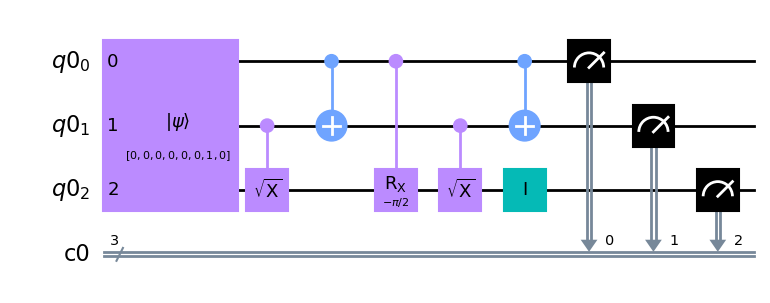

In [4]:
circ.draw('mpl')

['010']


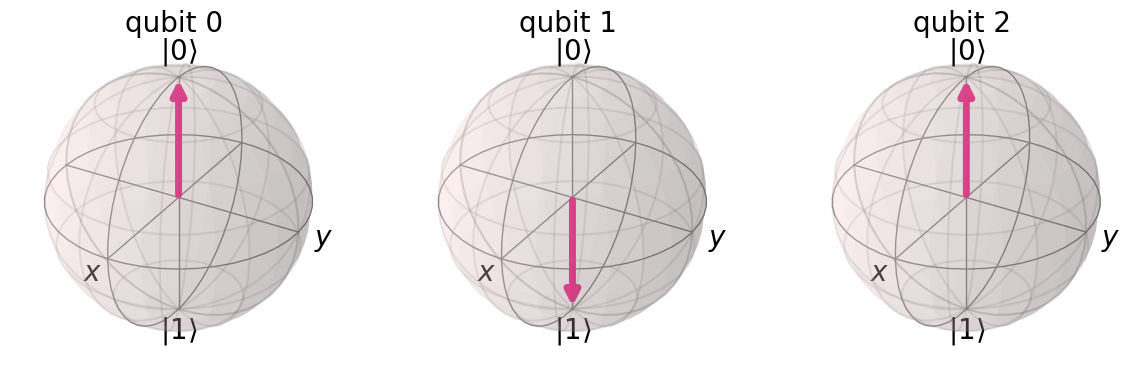

In [5]:
print(getMeasure(circ=circ, n=1, backend=backend))
getBloch(circ,backend)

The states of $X$ and $Y$ remain the same, but qubit 2 flips from 1 to 0 as $Y$ > $X$ is false.

In [6]:
circ = QuantumCircuit(qr)
circ.csx(1,2)
circ.cx(0,1)
circ.crx(-pi/2, 0, 2) #qiskit does not have an inverse V gate, use this instead (same effect)
circ.csx(1, 2)
circ.cx(0,1)

In [7]:
qbsc = circ.to_gate(label='QBSC') #store entire circuit in variable

In [13]:
circ2 = QuantumCircuit(7)
circ2.append(qbsc, [0,1,2]) # adds the QBSC circuit defined above across qubits 0, 1, and 2. Can define any 3 qubits within n

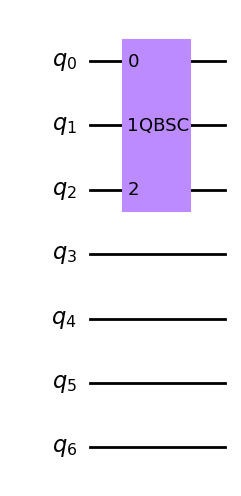

In [14]:
circ2.draw('mpl')

In [17]:
midcirc = QuantumCircuit(4)
# less than or greater than
midcirc.cx(0,2)
midcirc.crx(-pi/2, 2, 3)
midcirc.cx(1,2)
midcirc.csx(1,3)
midcirc.csx(2,3)
midcirc.cx(3,2)
# equal
midcirc.x(0)
midcirc.cx(0,1)

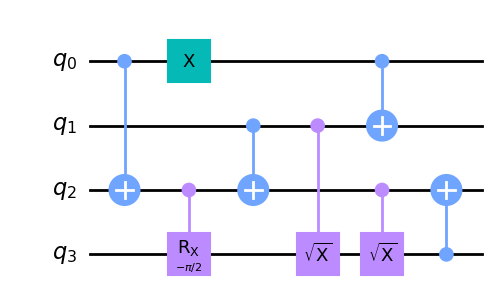

In [18]:
midcirc.draw('mpl')

In [19]:
mqc = midcirc.to_gate(label='MQC')

In [20]:
circ2.append(mqc, [3,4,5,6])

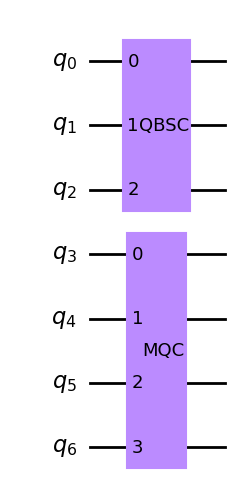

In [21]:
circ2.draw('mpl')